<a href="https://colab.research.google.com/github/iyappan24/Applied-AI-Notebooks/blob/master/SGD_REGRESSOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # SGD REGRESSOR FROM SCRATCH

-----
### Importing the libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import tqdm
%matplotlib inline
from tqdm import tqdm

In [0]:
df = pd.DataFrame(datasets.load_boston()['data'])

In [0]:
df.columns = datasets.load_boston().feature_names

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#loading the data
X = df
y = datasets.load_boston().target

In [0]:
X.shape

(506, 13)

** Standarad Scaling the Data ** 

In [0]:
sc= StandardScaler()
x = sc.fit_transform(X)
#sc1 = StandardScaler()
#y = sc1.fit_transform(Y.reshape(len(Y),1))

** Calculating the baseline Linear Regression Model from Sklearn for Comaprison ** 

In [0]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)
lpred = lr.predict(x)

In [0]:
mean_squared_error(lpred,y)

21.897779217687496

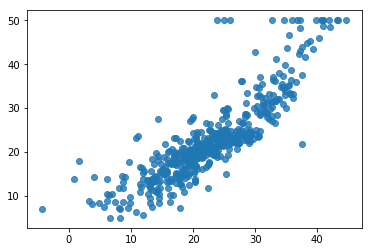

In [0]:
sns.regplot(lpred,y,fit_reg=False)

** BaseLine Model Score : MSE : 21.897779 ** 

------
** Feature importance and intercepts **

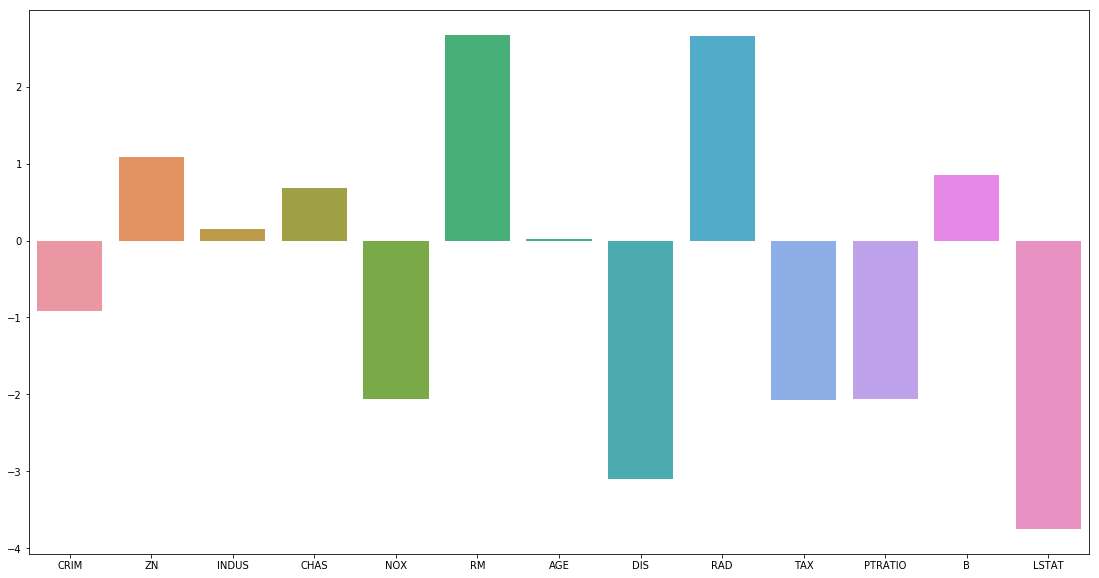

In [0]:
plt.figure(figsize = (19,10))
sns.barplot(y = lr.coef_,x= df.columns)

** Intecept Term: ** 

In [0]:
lr.intercept_

22.532806324110688

<br>

____

** SGD REGRESSOR FROM SCRATCH : ** 

In [0]:
class sgdRegressor:
     def __init__(self):
        self.__prev_w  = 0
        self.__prev_b = 0
        self.final_w = 0
        self.final_intercept = 0
        #function to print the learning rate        
             
     def learning_rate(self,initial,epoch,step,interval):
            """
            Initial : Initial Learning Rate 
            step_size : Size to divide the learning rate
            interval : Interval after which the step decay must happen
        
            """
            if epoch % interval == 0:
                return initial/step
            else:
                 return initial
    
     def fit(self,X,Y,Learning_Rate,step_size,interval,n_iterations):
        """
        X : Dataset
        Y : Target variable
        Learning_rate : Initial Learning Rate 
        step_size : Size to divide the learning rate
        interval : Interval after which the step decay must happen
        n_iterations : The number of iterations the Gradient Descent must run
    
        """
        self.__prev_w = np.random.randn(len(X[0]))
        self.__prev_b = np.random.randn()
        epoch = 0
        
        # Gradient Descent Algorithm
        for i in tqdm(range(n_iterations)):
            epoch = epoch + 1 
            #getting the learning rate for each epoch
            r = self.learning_rate(Learning_Rate,epoch,step_size,interval)
            val = self.cal_del(X,self.__prev_w,self.__prev_b,Y)
            self.__next_w = self.__prev_w - r * val['W']
            self.__next_b = self.__prev_b - r * val['b']
            
            # updating for next iteration
            self.__prev_w = self.__next_w
            self.__prev_b = self.__next_b
            
            if i == (n_iterations - 1):
                self.final_w = self.__prev_w
                self.final_intercept = self.__prev_b
        #end of loop
        
        print("Training Completed \n ")
        
        
    
    # Function to calculate the gradient of  the given iteration

     def cal_del(self,d,weight_w,weight_b,t):
            """
            d : Dataset
            weight_w : current Weight vector of W
            weight_b : current Bias term : Intercept term
            t : Target variable
        
            """
            w_gradient = np.zeros(len(d[0]))
            b_gradient = 0
            se = 0
            for i in range(len(d)):
                error = (t[i] - (np.dot(weight_w,d[i]) + weight_b)) #yi - wtxi + b
                w_gradient  = w_gradient + (error * -2 * d[i])
                b_gradient = b_gradient + (error * -2) 
                se = se + error**2
            return {'W':(w_gradient/len(d)),'b':(b_gradient/len(d))}
        
        
    
     def predict(self,d):
            """
            Function to predict the final target variable
            
            d: Dataset
            
            """
            pred = []
            for i in range(len(d)):
                pred.append(np.dot(self.final_w,d[i]) +self.final_intercept)
                
            return np.array(pred)
     
    
        
        
    

** Parameters : **
1. learning rate : 0.1
2. Step size = : 2.5
3. Interval : 10
4. Iterations : 1000

In [0]:
sgr = sgdRegressor()
sgr.fit(x,y,0.1,2.5,10,1000)

100%|██████████| 1000/1000 [00:03<00:00, 297.99it/s]

Training Completed 
 


In [0]:
pred = sgr.predict(x)

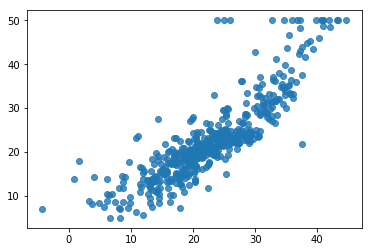

In [0]:
sns.regplot(pred,y,fit_reg=False)

In [0]:
mean_squared_error(pred,y)

21.89777921776083

** CUSTOM SGD REGRESSOR CODE : 21.89777921 **

** Feature Importance **

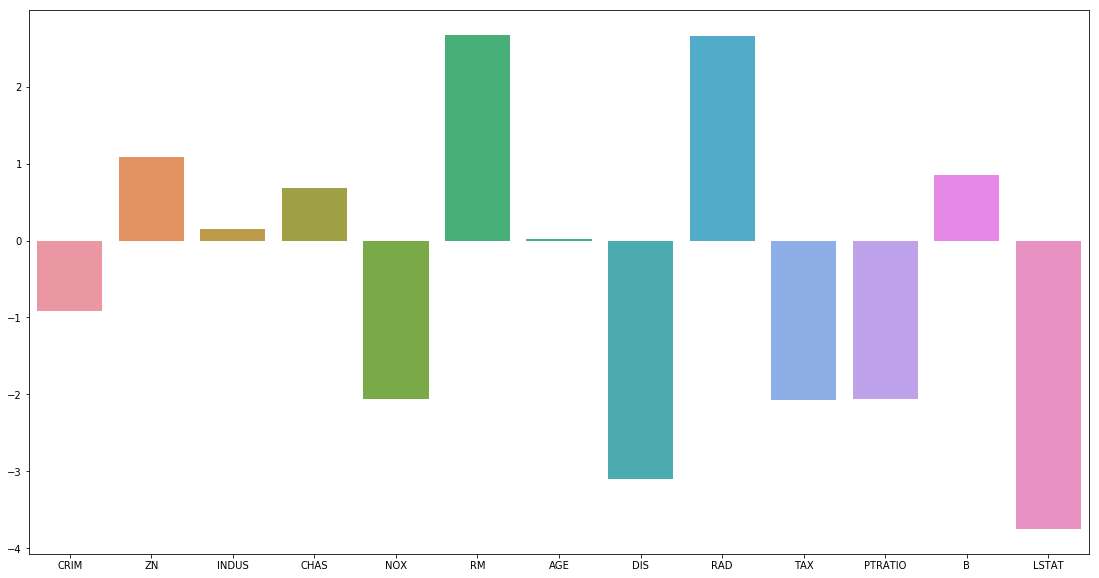

In [0]:
plt.figure(figsize = (19,10))
sns.barplot(y = sgr.final_w,x= df.columns)

___

** Intercept Term ** 

In [0]:
sgr.final_intercept

22.532806324110673

In [0]:
sgr.final_w

array([-0.92040958,  1.08097783,  0.14295859,  0.68220468, -2.06009097,
        2.67064297,  0.02111932, -3.10444867,  2.65876502, -2.07587367,
       -2.06215513,  0.85664027, -3.74867898])

In [0]:
pd.DataFrame(sc.inverse_transform(sgr.final_w)

array([-4.31097775e+00,  3.65497665e+01,  1.21165554e+01,  2.42274578e-01,
        3.16212510e-01,  8.15921882e+00,  6.91687981e+01, -2.73556357e+00,
        3.26770764e+01,  5.87212771e+01,  1.39954938e+01,  4.34803571e+02,
       -1.40900187e+01])

In [0]:
d = dict(zip(df.columns,sc.inverse_transform(sgr.final_w)))

In [0]:
d = sorted(d.items(), key=lambda x: x[1])

___

** Feature importance ** 

In [0]:
d

[('B', 434.8035712658269),
 ('AGE', 69.16879814170632),
 ('TAX', 58.721277081283915),
 ('ZN', 36.54976654582261),
 ('RAD', 32.67707642304066),
 ('PTRATIO', 13.995493782179771),
 ('INDUS', 12.11655541715351),
 ('RM', 8.159218815565783),
 ('NOX', 0.3162125103273935),
 ('CHAS', 0.242274578292473),
 ('DIS', -2.7355635710748993),
 ('CRIM', -4.310977747428861),
 ('LSTAT', -14.090018718872178)]